In [1]:
%load_ext autoreload
%autoreload 2

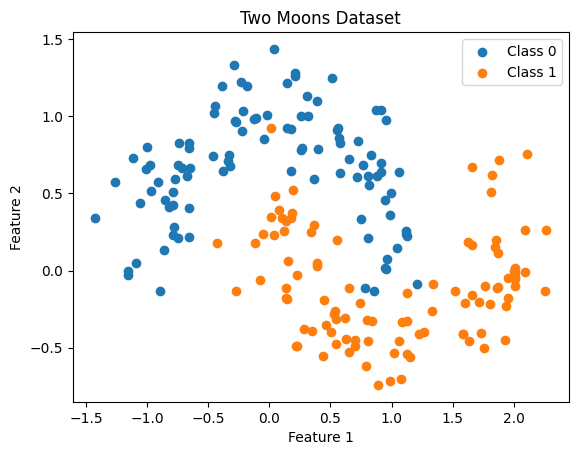

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate moons dataset
X, y = make_moons(n_samples=200, noise=0.18, random_state=42)

# Visualize the data
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1")
plt.legend()
plt.title("Two Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=42
)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [6]:
import sys
import os

sys.path.append(os.path.abspath('..'))

from MLP.nn import MLP
from MLP.grad_engine import Value

In [7]:
EPOCH = 1000
lr    = 0.05

In [16]:
clf = MLP(
    n_inputs=2,
    layers=[
        (8, "relu"),
        (8, "relu"),
        (1, "sigmoid")
    ],
    epochs=EPOCH,
    learning_rate=lr
)

In [17]:
clf.fit(X_train_scaled, y_train, loss_fn="binary_cross_entropy", patience = 20)

EPOCH 0: binary_cross_entropy = 1.327490908456551
EPOCH 1: binary_cross_entropy = 1.0963464957406932
EPOCH 2: binary_cross_entropy = 0.9134026209019137
EPOCH 3: binary_cross_entropy = 0.7732636611028072
EPOCH 4: binary_cross_entropy = 0.6691370386177841
EPOCH 5: binary_cross_entropy = 0.5936814508653955
EPOCH 6: binary_cross_entropy = 0.5397122943452378
EPOCH 7: binary_cross_entropy = 0.5011255663860384
EPOCH 8: binary_cross_entropy = 0.4731425825785427
EPOCH 9: binary_cross_entropy = 0.4523806096259779
EPOCH 10: binary_cross_entropy = 0.4364626931479989
EPOCH 11: binary_cross_entropy = 0.42398053666119745
EPOCH 12: binary_cross_entropy = 0.41384745844772164
EPOCH 13: binary_cross_entropy = 0.4055377942510422
EPOCH 14: binary_cross_entropy = 0.39851793406603675
EPOCH 15: binary_cross_entropy = 0.3925259601581401
EPOCH 16: binary_cross_entropy = 0.38733755086141214
EPOCH 17: binary_cross_entropy = 0.3827266225742016
EPOCH 18: binary_cross_entropy = 0.37855736263359896
EPOCH 19: binary_c

In [13]:
import numpy as np
preds = np.array([1 if clf(x).data > 0.5 else 0 for x in X_test_scaled])
accuracy = (preds == y_test).mean()
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.950


In [14]:
def plot_decision_boundary_custom(clf, X, y, scaler=None, resolution=0.01):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    grid = np.c_[xx.ravel(), yy.ravel()]

    if scaler:
        grid_scaled = scaler.transform(grid)
    else:
        grid_scaled = grid

    # Predict on grid
    Z = np.array([clf(x).data > 0.5 for x in grid_scaled])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.5)

    # Plot original data points
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", edgecolor='k')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", edgecolor='k')
    plt.legend()
    plt.title("Decision Boundary")
    plt.show()

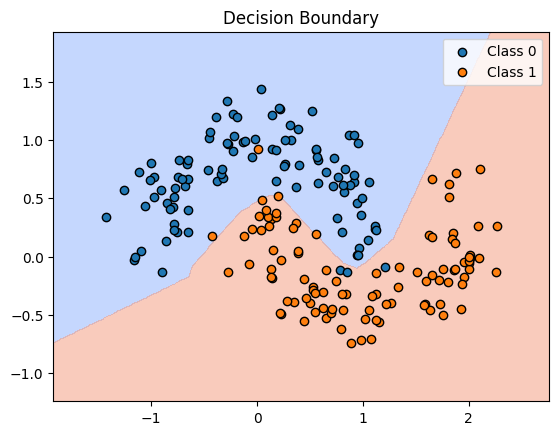

In [15]:
plot_decision_boundary_custom(clf, X, y, scaler=scaler, resolution=0.01)